In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test (1).csv')

In [3]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
train_df.shape

(381109, 12)

In [6]:
test_df.shape

(127037, 11)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [9]:
 #check imbalance class
print(train_df.Response.value_counts())
train_df.Response.value_counts(normalize=True)

0    334399
1     46710
Name: Response, dtype: int64


0    0.877437
1    0.122563
Name: Response, dtype: float64

In [10]:
#NUll Check
train_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [11]:
test_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [12]:
#EDA & Cleaning

In [13]:
def cat_plot(col):
    plt.figure(figsize=(14,6))
    plt.title('Title for' +col)
    sns.countplot(train_df[col])
    plt.show()

C:\Users\sankr\Pictures\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


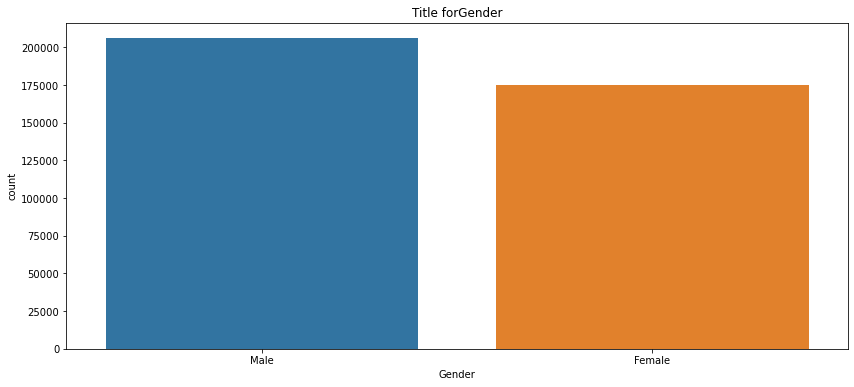

In [14]:
cat_plot('Gender')

C:\Users\sankr\Pictures\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


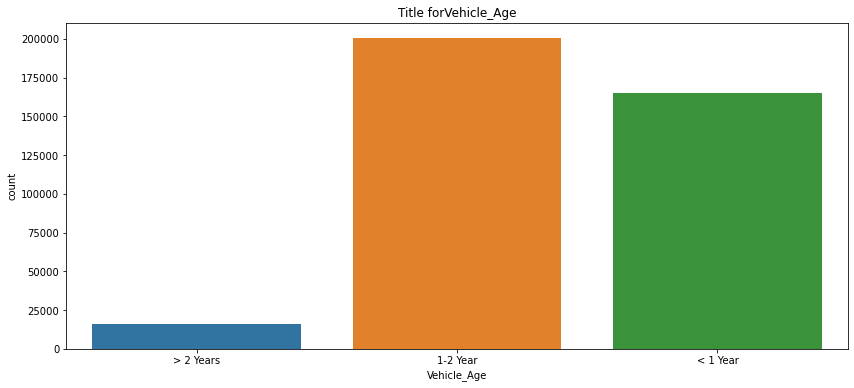

In [15]:
cat_plot('Vehicle_Age')

C:\Users\sankr\Pictures\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


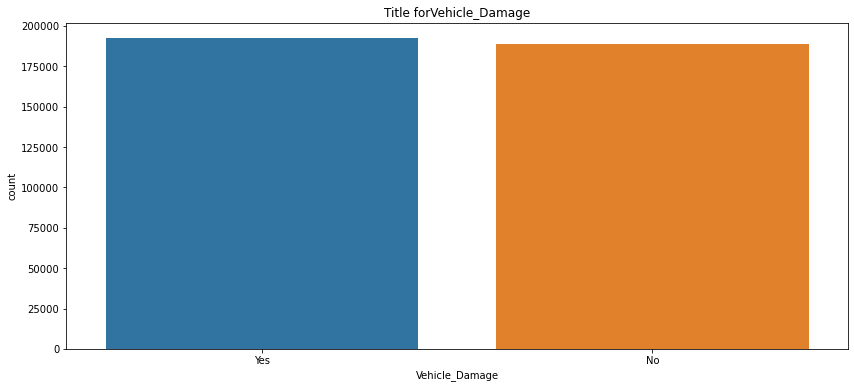

In [16]:
cat_plot('Vehicle_Damage')

In [17]:
#Numerical features

def num_plot():
    
    for col in train_df.select_dtypes(include=np.number):
        print('Min:',train_df[col].min())
        print('Max:',train_df[col].max())
        print('Mean:',train_df[col].mean())
        plt.figure(figsize=(16,7))
        plt.title('Title for' +col)
        sns.distplot(train_df[col],color='g')
        plt.show()

Min: 1
Max: 381109
Mean: 190555.0


C:\Users\sankr\Pictures\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


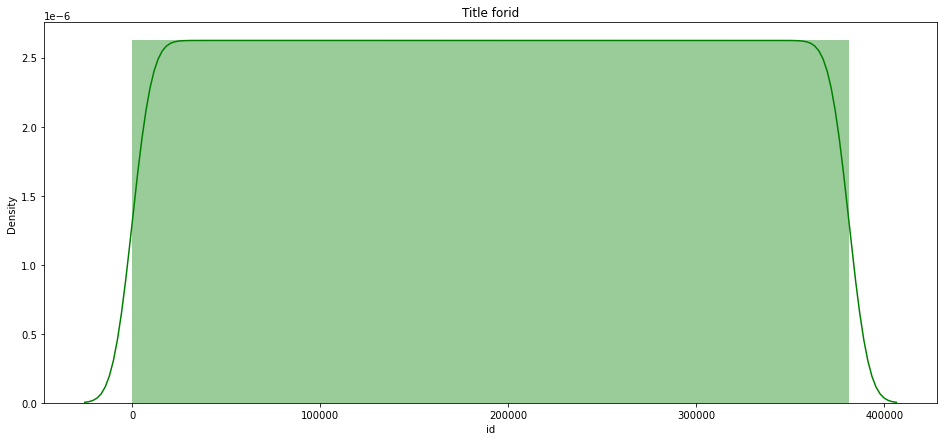

Min: 20
Max: 85
Mean: 38.822583565331705


C:\Users\sankr\Pictures\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


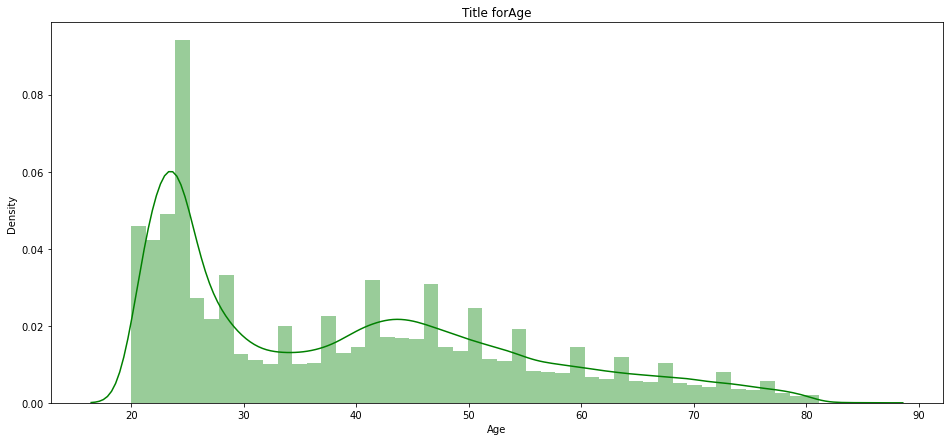

Min: 0
Max: 1
Mean: 0.9978693759528114


C:\Users\sankr\Pictures\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


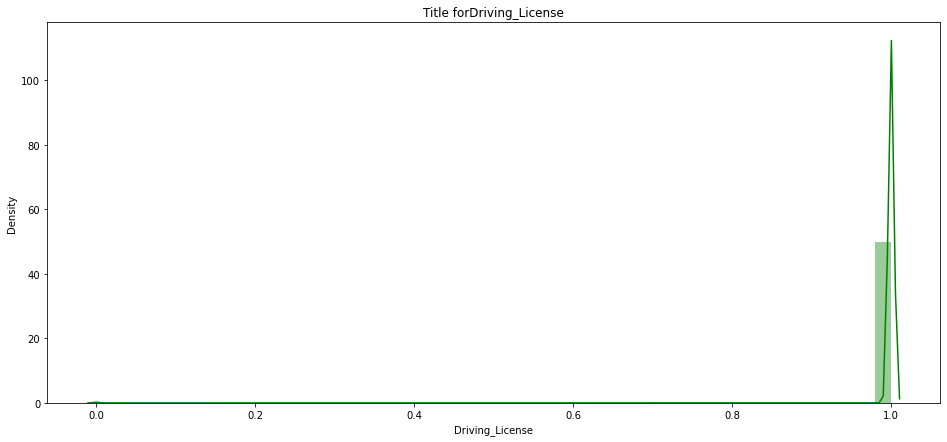

Min: 0.0
Max: 52.0
Mean: 26.388807401557035


C:\Users\sankr\Pictures\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


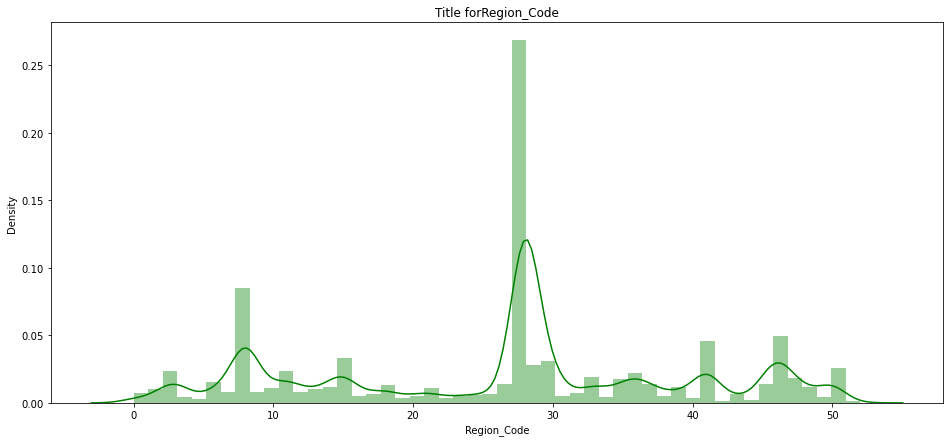

Min: 0
Max: 1
Mean: 0.4582101183650871


C:\Users\sankr\Pictures\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


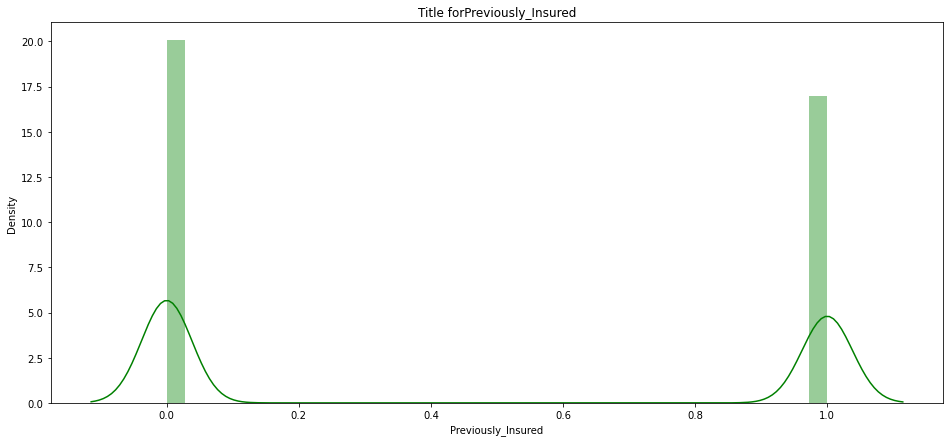

Min: 2630.0
Max: 540165.0
Mean: 30564.389581458323


C:\Users\sankr\Pictures\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


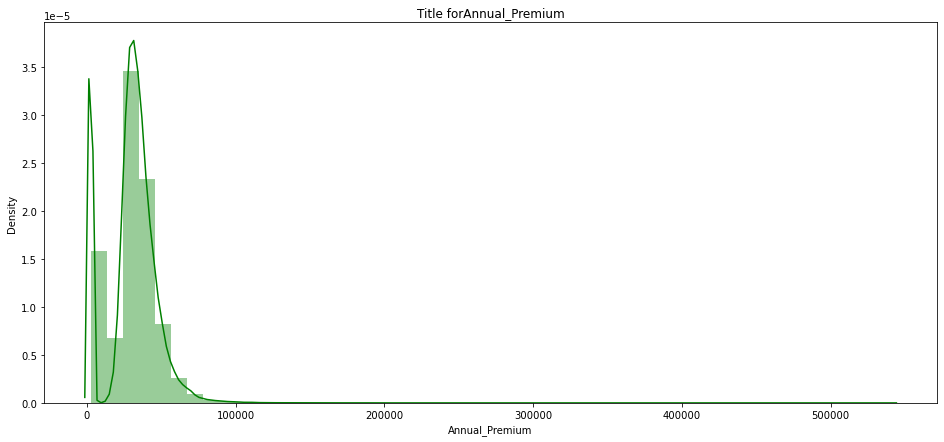

Min: 1.0
Max: 163.0
Mean: 112.03429465061177


C:\Users\sankr\Pictures\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


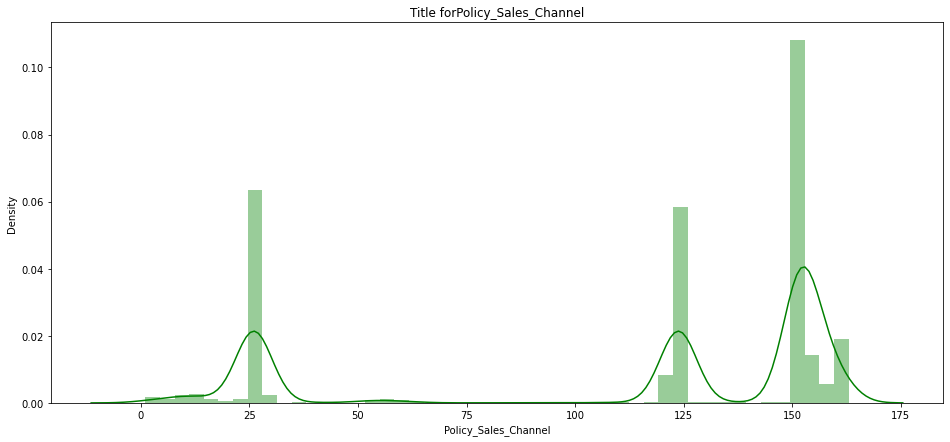

Min: 10
Max: 299
Mean: 154.34739667654136


C:\Users\sankr\Pictures\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


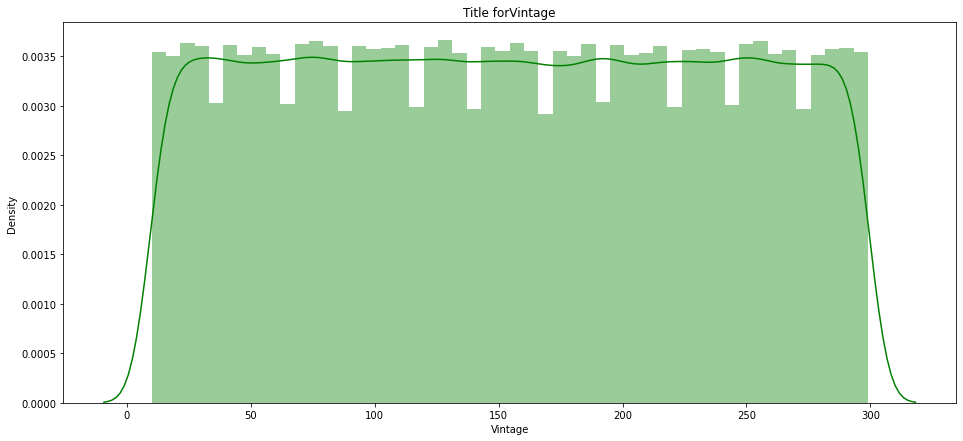

Min: 0
Max: 1
Mean: 0.12256336113815208


C:\Users\sankr\Pictures\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


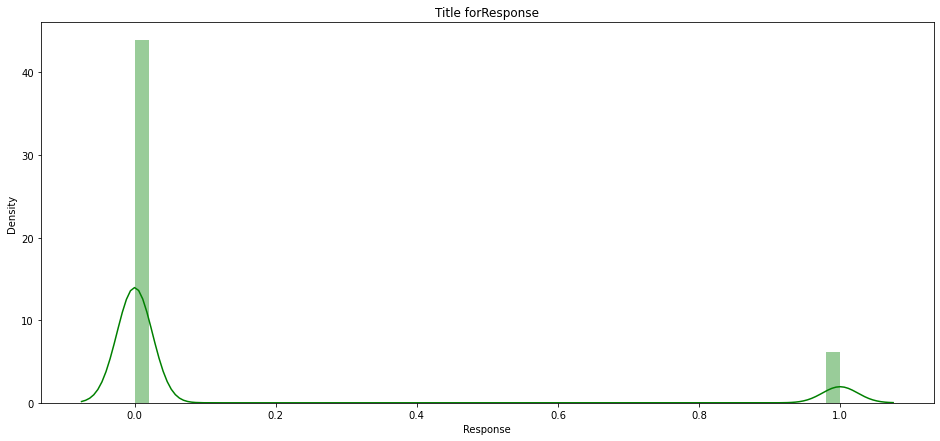

In [18]:
num_plot()

C:\Users\sankr\Pictures\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


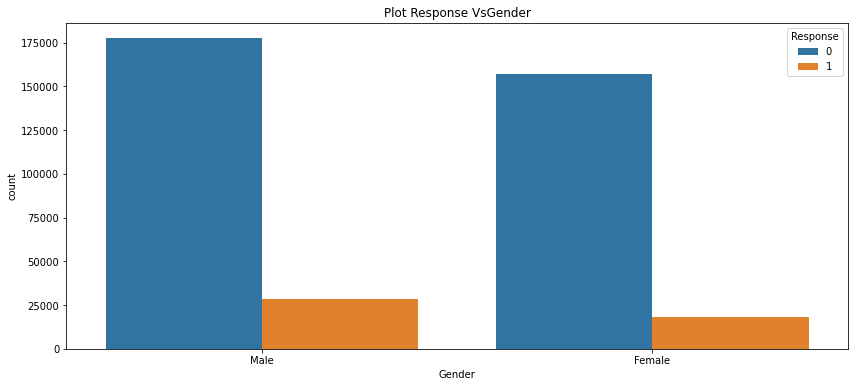

C:\Users\sankr\Pictures\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


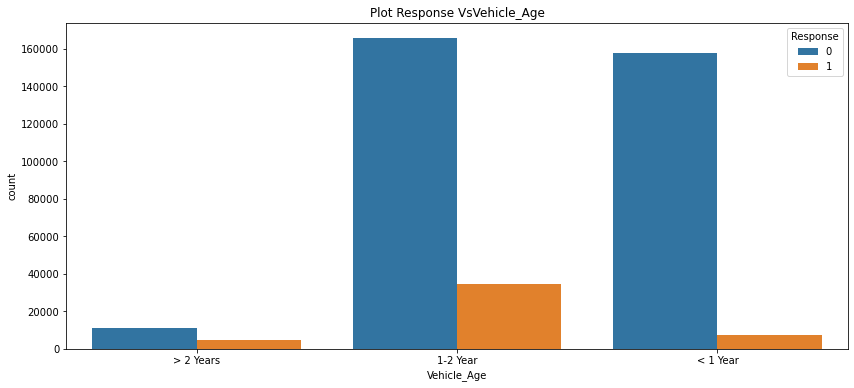

C:\Users\sankr\Pictures\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


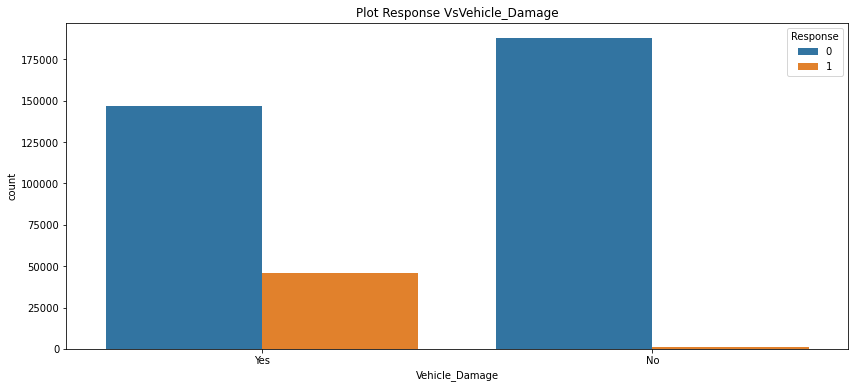

In [19]:
cols = ["Gender","Vehicle_Age","Vehicle_Damage"]

for i in cols:
    plt.figure(figsize=(14,6))
    plt.title('Plot Response Vs'  +i)
    sns.countplot(train_df[i],hue=train_df['Response'])
    plt.show()
    print()

In [20]:
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer,LabelEncoder

In [21]:
cat_df =train_df.select_dtypes(exclude=np.number)

In [22]:
cat_df.columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [23]:
lb = LabelEncoder()
lb.fit_transform(np.array(train_df['Vehicle_Age']).reshape(-1,1))

C:\Users\sankr\Pictures\New folder\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 2, ..., 1, 2, 0])

In [24]:
for i in cat_df.columns:
    train_df[i] = lb.fit_transform(np.array(train_df[i]).reshape(-1,1))

In [25]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int32  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int32  
 7   Vehicle_Damage        381109 non-null  int32  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int32(3), int64(6)
memory usage: 30.5 MB


In [27]:
train_df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [28]:
100000 - 46710

53290

In [29]:
no_df = train_df[train_df['Response']==0]

In [30]:
yes_df = train_df[train_df['Response']==1]

In [31]:
no_df.shape

(334399, 12)

In [32]:
yes_df.shape

(46710, 12)

In [33]:
df_53k = no_df.head(53290)

In [34]:
final = pd.concat([df_53k,yes_df])

In [35]:
final.to_csv('clean_train.csv',index=False)

In [36]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score,cross_validate

In [37]:
df = pd.read_csv('clean_train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
1,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
2,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
3,6,0,24,1,33.0,0,1,1,2630.0,160.0,176,0
4,7,1,23,1,11.0,0,1,1,23367.0,152.0,249,0


In [38]:
df = shuffle(df)

In [39]:
df.shape

(100000, 12)

In [40]:
x = df.drop(['id','Response'],axis=1)
y = df['Response']

In [41]:
x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=100,test_size=0.2)

In [42]:
x_train.shape

(80000, 10)

In [43]:
y_train.shape

(80000,)

In [44]:
x_test.shape

(20000, 10)

In [45]:
y_test.shape

(20000,)

In [46]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
#lr_pred = lr.predict(x_test)

print('Train acc:',accuracy_score(y_train,lr.predict(x_train)))
print('Test acc:',accuracy_score(y_test,lr.predict(x_test)))

Train acc: 0.5823125
Test acc: 0.5852


In [47]:
params = {
          'penalty':['l1','l2'],
          'C':[0.0001,0.001,0.01,0.1,1.0,10,100]
}

In [48]:
grid_lr = RandomizedSearchCV(lr,param_distributions=params,n_jobs=-1,cv=3,scoring='accuracy')
grid_lr.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10,
                                              100],
                                        'penalty': ['l1', 'l2']},
                   scoring='accuracy')

In [49]:
grid_lr.best_params_

{'penalty': 'l2', 'C': 0.001}

In [50]:
f_lr = LogisticRegression(penalty='l2',C=1.0)
f_lr.fit(x_train,y_train)

LogisticRegression()

In [51]:
y_pred = lr.predict(x_test)

In [52]:
print('Train score:',accuracy_score(y_train,lr.predict(x_train)))
print('Test score:',accuracy_score(y_test,y_pred))

Train score: 0.5823125
Test score: 0.5852


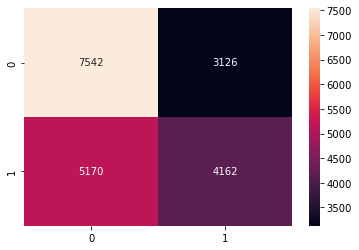

In [53]:

cm = confusion_matrix(y_test,y_pred)
cm = pd.DataFrame(data=cm,columns=[0,1],index=[0,1])
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [54]:
f1_score(y_test,y_pred)

0.5008423586040914

In [55]:
np.array(x_test)[1]

array([1.00e+00, 2.60e+01, 1.00e+00, 8.00e+00, 1.00e+00, 1.00e+00,
       0.00e+00, 2.63e+03, 1.60e+02, 2.98e+02])

In [56]:
f_lr.predict(np.array(x_test)[1].reshape(1,-1))[0]

0

In [57]:
np.array(y_test)[1]

0